# THEORY - DIFFERENTIAL MANCHESTER CODING

### also known as biphase mark code

#### used by IEEE 802.5 specification for Token Ring LAN 

#### if transition at beginning then zero
#### if no transition at beginning then One
#### THERE IS ALWAYS TRANSITION IN THE MIDDLE OF THE BIT INTERVAL

            Bit Value (b[j])	Transition at Beginning	Transition in Middle
                    0	              Yes	               Yes 
                    1	               No	               Yes 

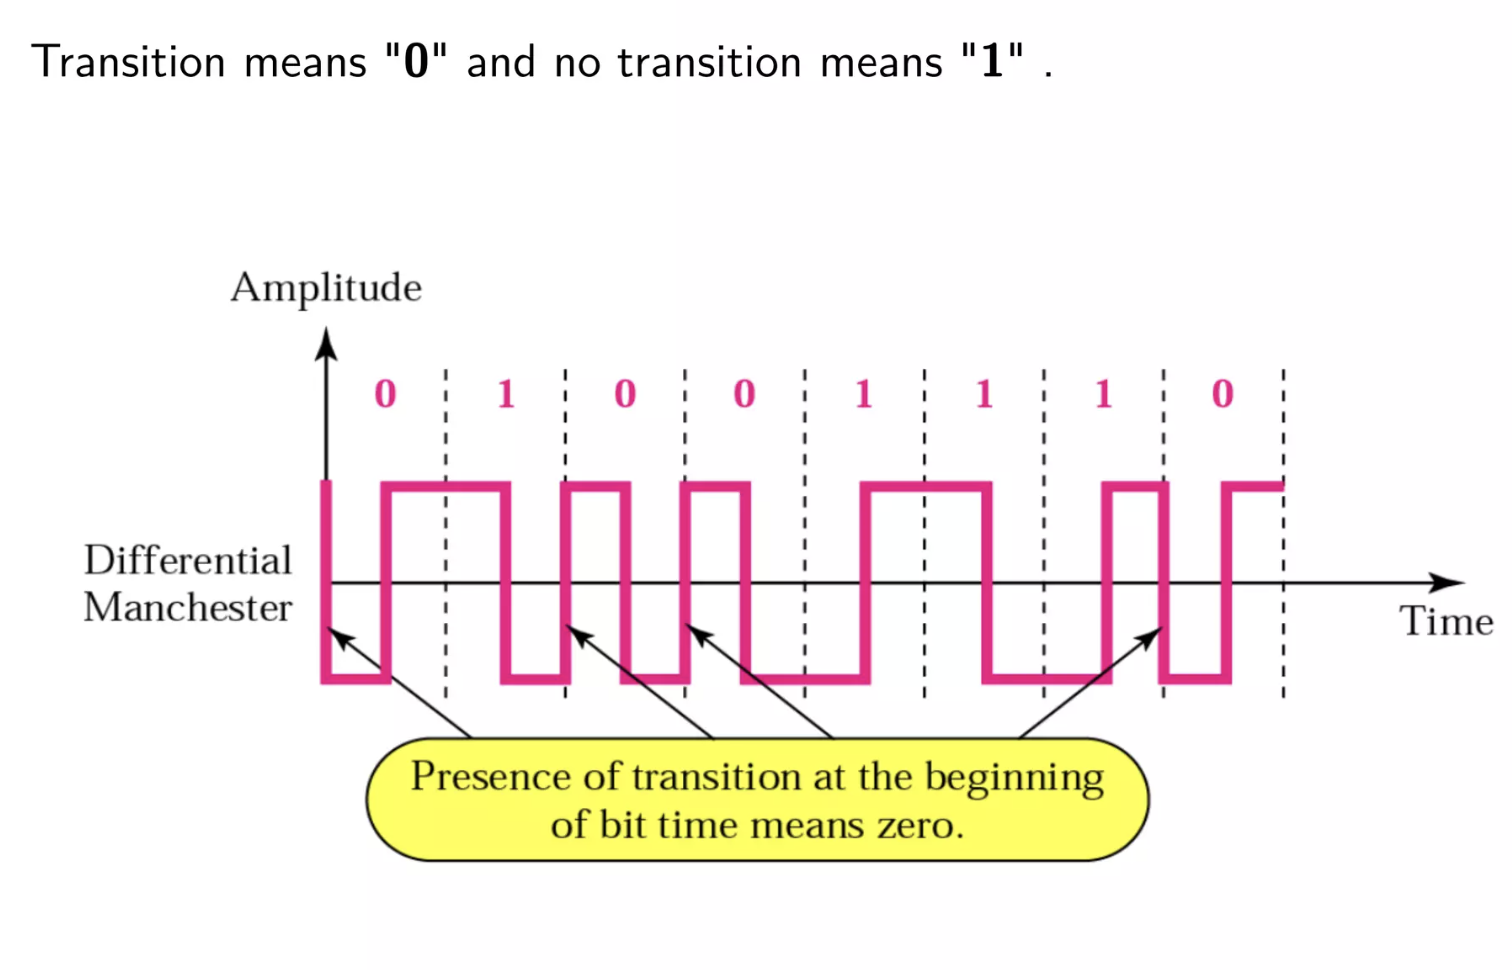

Differential Manchester:
<li>There's always a transition in the middle of the bit interval.</li>
<li>A transition at the beginning signifies a 0.</li>
<li>No transition at the beginning signifies a 1.</li>

In [249]:
import matplotlib.pyplot as plt

##### initialize current_level to 1 
##### encoded_signal will store the levels of the signal at different times,
##### and time keeps track of these times.

In [250]:

def differential_manchester_encode(data):
    # Initial conditions
    current_level = 1
    encoded_signal = []
    time = []

    for i, bit in enumerate(data):
        # Start of bit interval
        if bit == '0':
            # Transition at the start for '0'
            current_level = -current_level
        encoded_signal.extend([current_level, current_level])
        time.extend([i, i + 0.5])

        # Middle of the bit interval transition
        current_level = -current_level
        encoded_signal.extend([current_level, current_level])
        time.extend([i + 0.5, i + 1])

    return time, encoded_signal

We iterate through each bit in the input data.

If the bit is '0', we toggle current_level at the start of the bit interval (i.e., there's a transition).

We add two points to encoded_signal for the first half of the bit interval and corresponding times to time.

Regardless of the bit's value, we toggle current_level again in the middle of the bit interval (this is the mandatory mid-bit transition), then add these values for the second half.

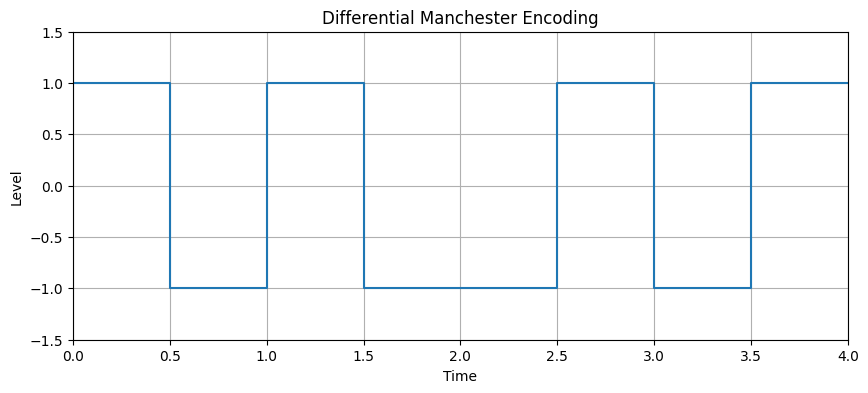

In [236]:
def plot_signal(data):
    time, encoded_signal = differential_manchester_encode(data)
    plt.figure(figsize=(10, 4))
    plt.step(time, encoded_signal, where='post')
    plt.title('Differential Manchester Encoding')
    plt.xlabel('Time')
    plt.ylabel('Level')
    plt.ylim(-1.5, 1.5)
    plt.xlim(0, len(data))
    plt.grid(True)
    plt.show()

# Example binary data
data = "1010"
plot_signal(data)
